# TP4 : Pratique de clustering

## 1- Prise en main des données Unpopular Spotify Songs (USS) :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
import time

In [2]:
data = pd.read_csv("unpopular_songs_full.csv")
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id,Unnamed: 17
0,0.722,0.476,5,-8.203,1,0.0896,0.67000,0.0000,0.0926,0.9270,151.968,220549,False,8,Este Corazon,El Javi,0Z4UqiPI5c4dMJ5iPyO61d,NaN
1,0.955,0.281,0,-11.392,0,0.4660,0.00480,0.0595,0.1220,0.0934,127.991,149543,True,0,thinking and doing,Br80,568FGhLEnSZhl82t0YmQ96,NaN
2,0.753,0.355,8,-11.799,1,0.5140,0.57300,0.0000,0.0735,0.6000,91.978,130019,True,0,Puzzlement,JpThaRuler,4Lex8QZVkptfw2PZtjoXlp,NaN
3,0.650,0.331,3,-10.818,0,0.3830,0.86500,0.0000,0.1050,0.5810,99.513,116193,True,0,Sensi,JpThaRuler,4pMqXl6EfmZrodPMYHUq9Z,NaN
4,0.690,0.360,4,-15.624,0,0.4550,0.76400,0.0000,0.1810,0.1050,89.893,111827,True,0,Rass,JpThaRuler,2pvQEKHtlkHb6ijMwcMuKV,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,0.862,0.578,10,-9.364,0,0.4430,0.01460,0.0000,0.1190,0.3850,81.059,139442,True,0,No Competition,T-Tomp,35ebaAwvPLjeTVUMQhyyqW,NaN
4069,0.686,0.511,8,-10.253,0,0.4350,0.01010,0.0000,0.1100,0.4020,137.768,97440,True,0,Test Me,T-Tomp,5WYoA9mhHWSyHkaGI3qKsO,NaN
4070,0.725,0.555,8,-13.018,1,0.3910,0.00189,0.0000,0.1100,0.1390,139.806,91742,True,0,Poof,T-Tomp,7aAsvABCFbZa7FsolZTASW,NaN
4071,0.763,0.534,1,-8.889,1,0.3170,0.00531,0.0000,0.1110,0.3020,82.507,113868,True,0,Right Now,T-Tomp,4c49ADGqWfJkA1vB45oXVG,NaN


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073 entries, 0 to 4072
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4073 non-null   float64
 1   energy            4073 non-null   float64
 2   key               4073 non-null   int64  
 3   loudness          4073 non-null   float64
 4   mode              4073 non-null   int64  
 5   speechiness       4073 non-null   float64
 6   acousticness      4073 non-null   float64
 7   instrumentalness  4073 non-null   float64
 8   liveness          4073 non-null   float64
 9   valence           4073 non-null   float64
 10  tempo             4073 non-null   float64
 11  duration_ms       4073 non-null   int64  
 12  explicit          4073 non-null   bool   
 13  popularity        4073 non-null   int64  
 14  track_name        4073 non-null   object 
 15  track_artist      4073 non-null   object 
 16  track_id          4073 non-null   object 


In [4]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
count,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4.073000e+03,4073.000000
mean,0.584909,0.545931,5.171372,-10.877235,0.658237,0.142364,0.327200,0.199610,0.198481,0.468564,119.483633,2.098864e+05,0.927572
std,0.195275,0.253181,3.571346,6.082619,0.474359,0.169173,0.334721,0.348140,0.177769,0.273403,30.626790,1.140622e+05,1.880363
min,0.000000,0.000020,0.000000,-43.046000,0.000000,0.000000,0.000000,0.000000,0.016500,0.000000,0.000000,1.795100e+04,0.000000
25%,0.460000,0.372000,2.000000,-13.181000,0.000000,0.038600,0.030200,0.000000,0.096300,0.249000,96.512000,1.493330e+05,0.000000
50%,0.608000,0.565000,5.000000,-9.338000,1.000000,0.060300,0.194000,0.000037,0.124000,0.460000,119.948000,1.955790e+05,0.000000
75%,0.732000,0.736000,8.000000,-6.693000,1.000000,0.195000,0.589000,0.219000,0.241000,0.684000,139.993000,2.461730e+05,1.000000
max,0.973000,1.000000,11.000000,0.416000,1.000000,0.962000,0.996000,1.000000,0.990000,0.987000,215.983000,3.408890e+06,9.000000


In [5]:
data['duration_ms'].describe()

count    4.073000e+03
mean     2.098864e+05
std      1.140622e+05
min      1.795100e+04
25%      1.493330e+05
50%      1.955790e+05
75%      2.461730e+05
max      3.408890e+06
Name: duration_ms, dtype: float64

In [6]:
print("Valeurs manquantes par colonne:")
print(data.isnull().sum())

Valeurs manquantes par colonne:
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
explicit               0
popularity             0
track_name             0
track_artist           0
track_id               0
Unnamed: 17         4072
dtype: int64


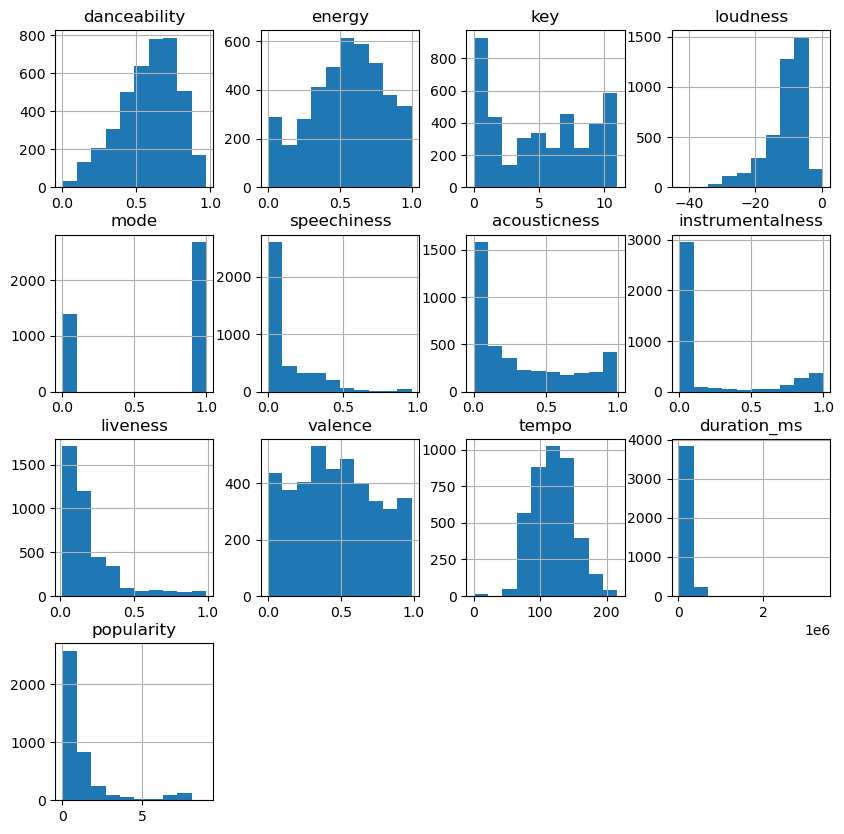

In [7]:
data.hist(figsize=(10, 10))
plt.show()

In [8]:
correlation_matrix = data.corr()
print("Matrice de corrélation:")
print(correlation_matrix)

Matrice de corrélation:
                  danceability    energy       key  loudness      mode  \
danceability          1.000000  0.158145  0.010114  0.322875 -0.059184   
energy                0.158145  1.000000  0.013762  0.727782 -0.041706   
key                   0.010114  0.013762  1.000000 -0.007885 -0.166626   
loudness              0.322875  0.727782 -0.007885  1.000000  0.014191   
mode                 -0.059184 -0.041706 -0.166626  0.014191  1.000000   
speechiness           0.223674  0.015146  0.023500 -0.028699 -0.092249   
acousticness         -0.281576 -0.648173  0.004109 -0.571242  0.061864   
instrumentalness     -0.293313 -0.298892  0.023555 -0.500009 -0.029501   
liveness             -0.229833  0.126647 -0.005811 -0.099211 -0.007769   
valence               0.492361  0.356126  0.037583  0.369168  0.016731   
tempo                 0.070072  0.249868  0.023043  0.256980  0.004390   
duration_ms          -0.066468  0.079512  0.018420  0.090615 -0.036953   
explicit      

C:\Users\user\AppData\Local\Temp\ipykernel_10884\2760910633.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


C:\Users\user\AppData\Local\Temp\ipykernel_10884\732772427.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


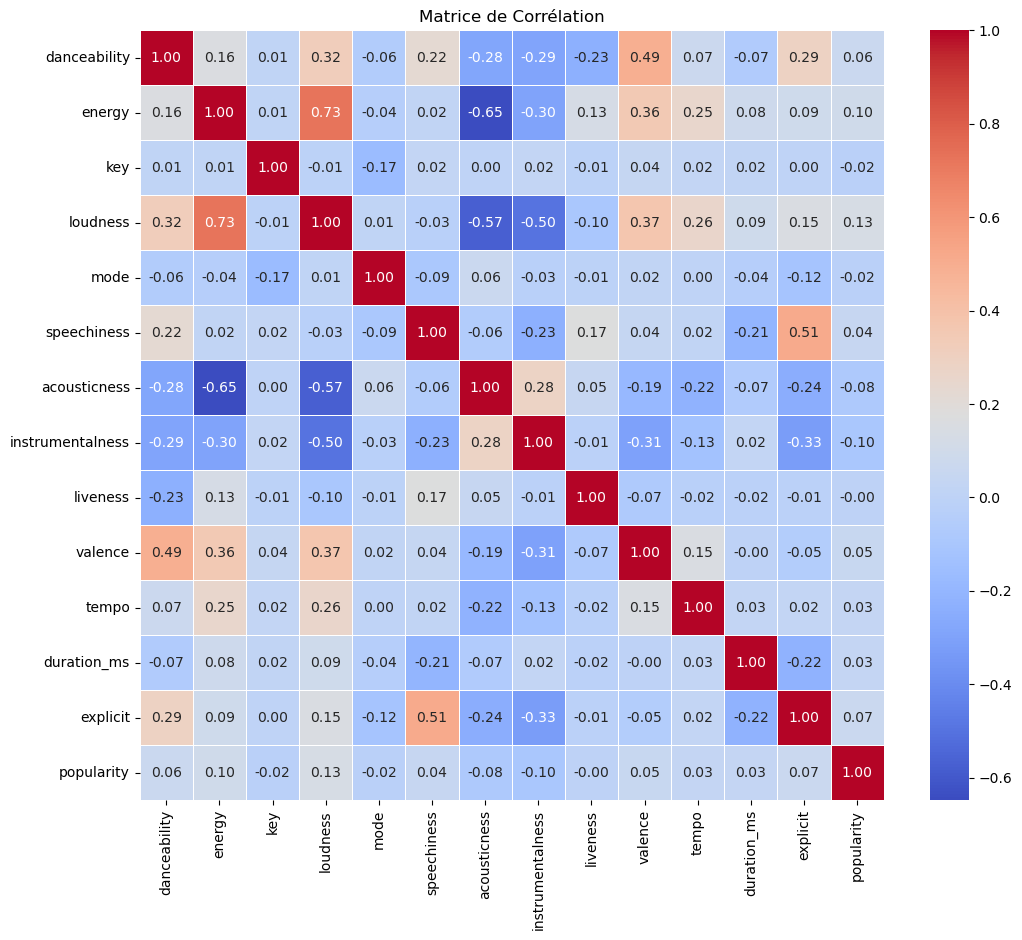

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
corr_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de Corrélation")
plt.show()

Les colonnes "acousticness" et "energy" ont une corrélation importante de -0.648173. Vous pourriez envisager de ne conserver qu'une de ces colonnes, en fonction de la pertinence pour votre problème.
key
mode
acousticness
instrumentalness
liveness
valence
Colonnes fortement corrélées :
['loudness', 'acousticness', 'instrumentalness', 'explicit']

## 2- Préparation des données et classification :

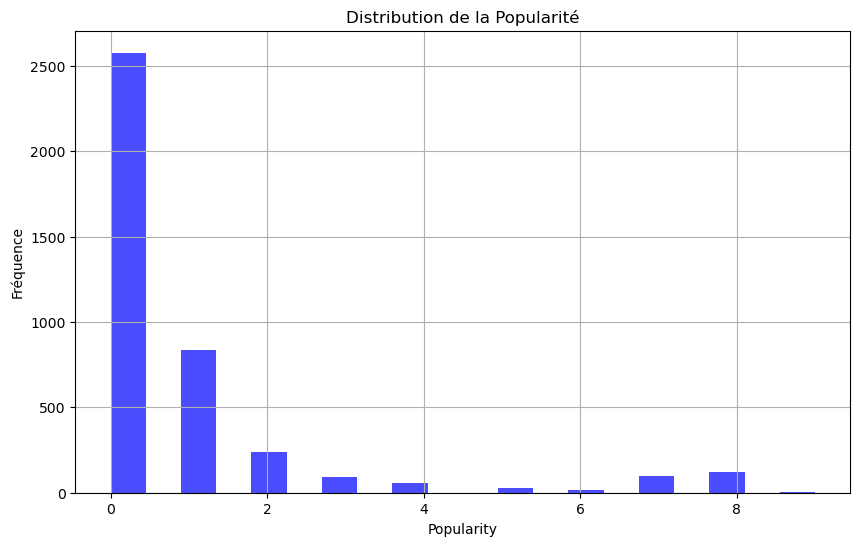

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(data['popularity'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution de la Popularité')
plt.xlabel('Popularity')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [11]:
popularity_counts = data['popularity'].value_counts()
# Triez les valeurs par indice (popularité)
popularity_counts = popularity_counts.sort_index()
# Affichez le nombre exact pour chaque valeur de popularité
for popularity, count in popularity_counts.items():
    print("Classe",popularity,":",count,"occurrences.")


Classe 0 : 2576 occurrences.
Classe 1 : 836 occurrences.
Classe 2 : 240 occurrences.
Classe 3 : 93 occurrences.
Classe 4 : 56 occurrences.
Classe 5 : 30 occurrences.
Classe 6 : 16 occurrences.
Classe 7 : 99 occurrences.
Classe 8 : 123 occurrences.
Classe 9 : 4 occurrences.


In [12]:
correlation_matrix['popularity']

danceability        0.063003
energy              0.097132
key                -0.020532
loudness            0.134261
mode               -0.017296
speechiness         0.042300
acousticness       -0.080361
instrumentalness   -0.100019
liveness           -0.000472
valence             0.052275
tempo               0.033897
duration_ms         0.031168
explicit            0.065788
popularity          1.000000
Name: popularity, dtype: float64

In [4]:
col = ['track_name', 'track_artist',
       'track_id', 'Unnamed: 17']
#,'key','explicit','liveness','mode','acousticness','loudness', 'tempo'
data = data.drop(columns = col) 
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity
0,0.722,0.476,5,-8.203,1,0.0896,0.67000,0.0000,0.0926,0.9270,151.968,220549,False,8
1,0.955,0.281,0,-11.392,0,0.4660,0.00480,0.0595,0.1220,0.0934,127.991,149543,True,0
2,0.753,0.355,8,-11.799,1,0.5140,0.57300,0.0000,0.0735,0.6000,91.978,130019,True,0
3,0.650,0.331,3,-10.818,0,0.3830,0.86500,0.0000,0.1050,0.5810,99.513,116193,True,0
4,0.690,0.360,4,-15.624,0,0.4550,0.76400,0.0000,0.1810,0.1050,89.893,111827,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,0.862,0.578,10,-9.364,0,0.4430,0.01460,0.0000,0.1190,0.3850,81.059,139442,True,0
4069,0.686,0.511,8,-10.253,0,0.4350,0.01010,0.0000,0.1100,0.4020,137.768,97440,True,0
4070,0.725,0.555,8,-13.018,1,0.3910,0.00189,0.0000,0.1100,0.1390,139.806,91742,True,0
4071,0.763,0.534,1,-8.889,1,0.3170,0.00531,0.0000,0.1110,0.3020,82.507,113868,True,0


In [5]:
from sklearn.preprocessing import StandardScaler
df = data.drop('popularity', axis=1)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit
0,0.722,0.476,5,-8.203,1,0.0896,0.67000,0.0000,0.0926,0.9270,151.968,220549,False
1,0.955,0.281,0,-11.392,0,0.4660,0.00480,0.0595,0.1220,0.0934,127.991,149543,True
2,0.753,0.355,8,-11.799,1,0.5140,0.57300,0.0000,0.0735,0.6000,91.978,130019,True
3,0.650,0.331,3,-10.818,0,0.3830,0.86500,0.0000,0.1050,0.5810,99.513,116193,True
4,0.690,0.360,4,-15.624,0,0.4550,0.76400,0.0000,0.1810,0.1050,89.893,111827,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,0.862,0.578,10,-9.364,0,0.4430,0.01460,0.0000,0.1190,0.3850,81.059,139442,True
4069,0.686,0.511,8,-10.253,0,0.4350,0.01010,0.0000,0.1100,0.4020,137.768,97440,True
4070,0.725,0.555,8,-13.018,1,0.3910,0.00189,0.0000,0.1100,0.1390,139.806,91742,True
4071,0.763,0.534,1,-8.889,1,0.3170,0.00531,0.0000,0.1110,0.3020,82.507,113868,True


In [6]:
col = df.select_dtypes(include=['float64']).columns

scaler = StandardScaler()

df[col] = scaler.fit_transform(df[col])
df['popularity'] = data['popularity']


df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity
0,0.702125,-0.276242,5,0.439706,1,-0.311931,1.024262,-0.573432,-0.595684,1.676983,1.060782,220549,False,8
1,1.895459,-1.046536,0,-0.084639,0,1.913279,-0.963311,-0.402503,-0.430281,-1.372367,0.277809,149543,True,0
2,0.860894,-0.754219,8,-0.151559,1,2.197047,0.734432,-0.573432,-0.703140,0.480801,-0.898201,130019,True,0
3,0.333369,-0.849024,3,0.009740,0,1.422598,1.606909,-0.573432,-0.525922,0.411298,-0.652144,116193,True,0
4,0.538233,-0.734468,4,-0.780478,0,1.848249,1.305127,-0.573432,-0.098349,-1.329933,-0.966287,111827,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,1.419150,0.126681,10,0.248811,0,1.777307,-0.934029,-0.573432,-0.447159,-0.305680,-1.254763,139442,True,0
4069,0.517747,-0.137984,8,0.102639,0,1.730013,-0.947475,-0.573432,-0.497793,-0.243493,0.597079,97440,True,0
4070,0.717489,0.035826,8,-0.351991,1,1.469893,-0.972005,-0.573432,-0.497793,-1.205560,0.663630,91742,True,0
4071,0.912110,-0.047129,1,0.326912,1,1.032418,-0.961787,-0.573432,-0.492167,-0.609298,-1.207478,113868,True,0


In [7]:
X = df.drop('popularity', axis=1)
y = df['popularity']

clf = DecisionTreeClassifier(max_depth=5)

debut = time.time()

scores = cross_val_score(clf, X, y, cv=10)  

duree = time.time() - debut

print("Performances du classifieur :")
error = 1 - np.mean(scores)
print("Taux d'erreur  : ", error, "scores :", np.mean(scores), "Temps :", duree,"s.")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Performances du classifieur :
Taux d'erreur  :  0.3940532109649758 scores : 0.6059467890350242 Temps : 0.5349688529968262 s.


In [17]:
k = int(np.log(len(X)))

knn = KNeighborsClassifier(n_neighbors=k)
debut = time.time()

scores = cross_val_score(knn, X, y, cv=10)

duree = time.time() - debut

print("Performances du classifieur :")
error = 1 - np.mean(scores)
print("Taux d'erreur  : ", error, "scores :", np.mean(scores), "Temps :", duree,"s.")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Performances du classifieur :
Taux d'erreur  :  0.39749241219829456 scores : 0.6025075878017054 Temps : 0.3761918544769287 s.


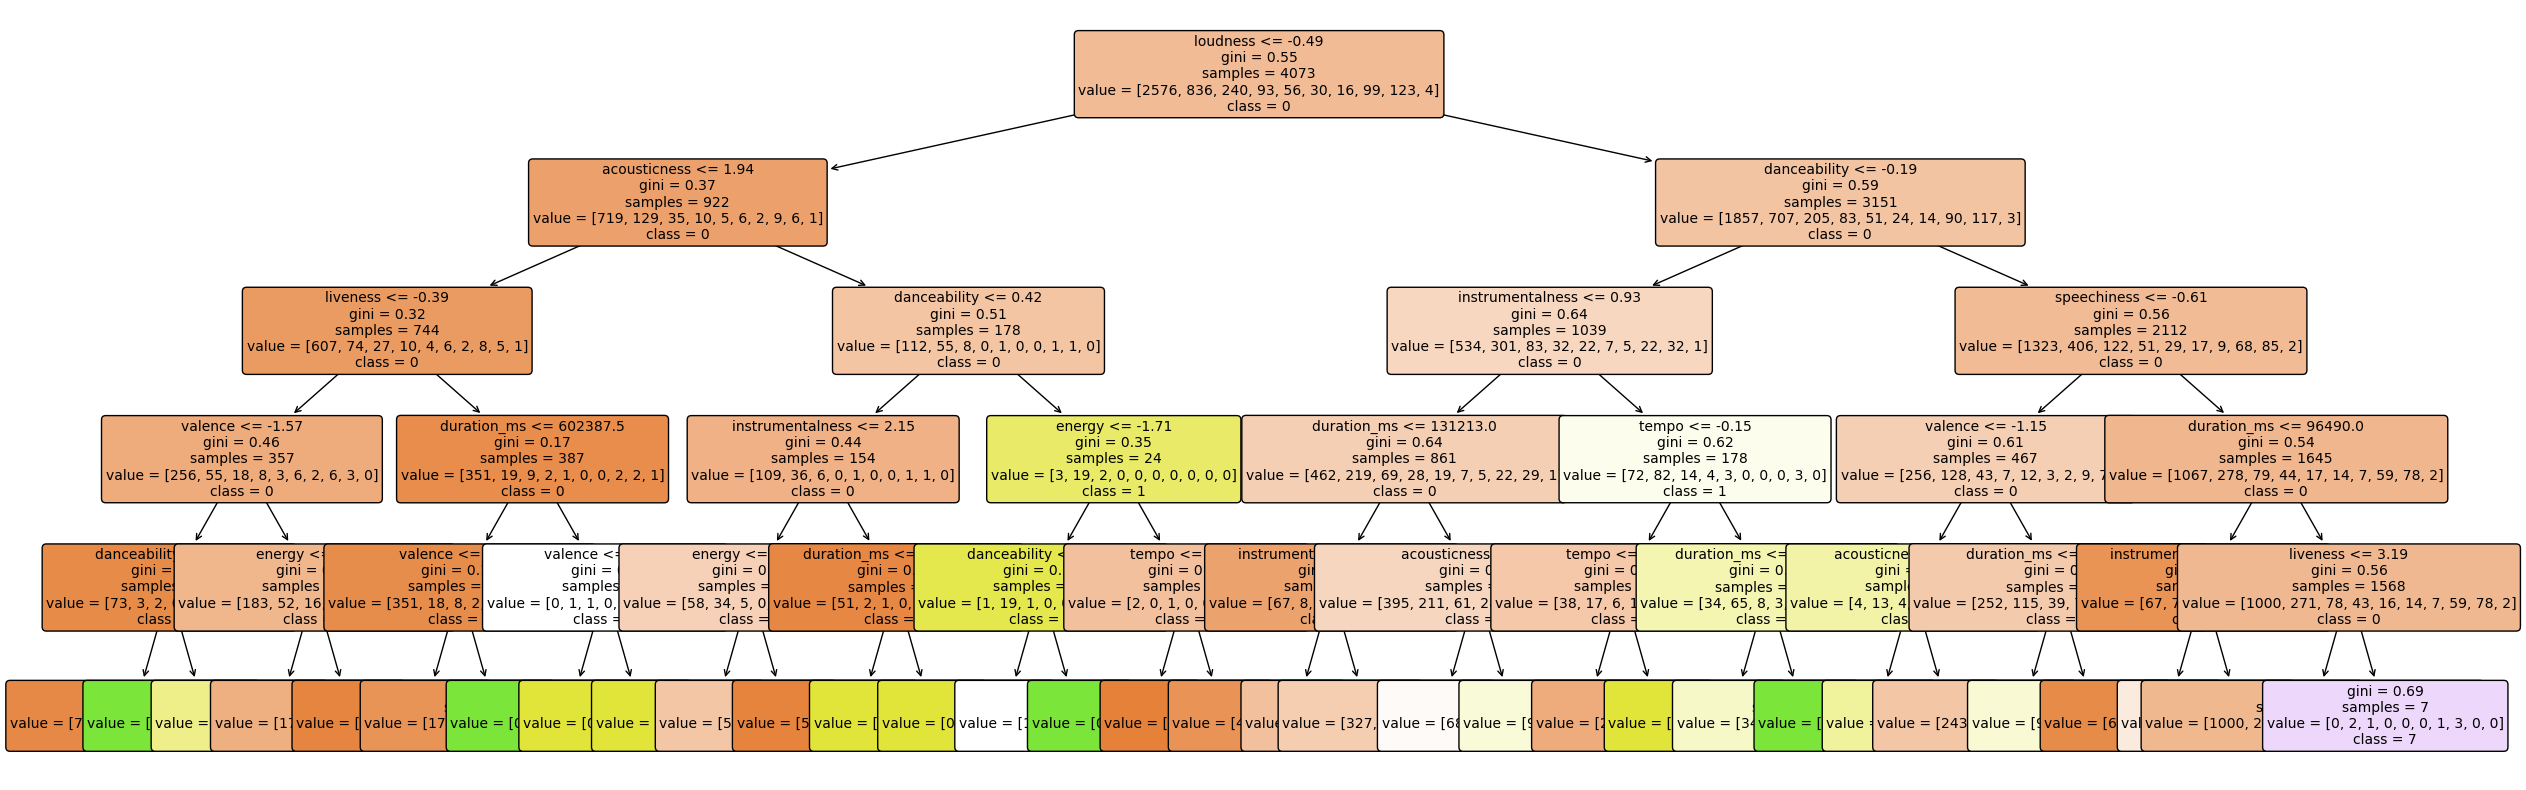

In [8]:
clf.fit(X, y)

plt.figure(figsize=(30, 10))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=[str(i) for i in range(12)], rounded=True, precision=2, fontsize=10)
plt.show()


In [10]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Supposons que X contient vos caractéristiques et y votre variable cible (popularity)
X = df.drop('popularity', axis=1)  # Excluez la colonne cible
y = df['popularity']

# Créez un classifieur d'arbre de décision avec une profondeur maximale de 5
clf = DecisionTreeClassifier(max_depth=5)

# Entraînez le modèle sur toutes les données
clf.fit(X, y)

# Obtenez l'importance des fonctionnalités
feature_importances = clf.feature_importances_

# Créez un DataFrame pour visualiser les résultats
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Triez le DataFrame par ordre décroissant d'importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Affichez les 6 premières colonnes les plus discriminantes
top_features = importance_df.head(6)
print("Les 6 colonnes les plus discriminantes :")
print(top_features)


# Liste complète des colonnes
all_columns = X.columns.tolist()

# Liste des colonnes les plus discriminantes
discriminant_columns = top_features['Feature'].tolist()

# Colonnes absentes
absent_columns = list(set(all_columns) - set(discriminant_columns))

print("Les colonnes absentes :")
print(absent_columns)


Les 6 colonnes les plus discriminantes :
             Feature  Importance
0       danceability    0.170039
3           loudness    0.163005
11       duration_ms    0.128614
7   instrumentalness    0.116887
6       acousticness    0.098114
1             energy    0.088294
Les colonnes absentes :
['valence', 'key', 'liveness', 'explicit', 'speechiness', 'tempo', 'mode']


In [22]:
from sklearn.model_selection import cross_val_score
import numpy as np

discriminant_columns = top_features['Feature'].tolist()
col =[ 'energy','valence','duration_ms','speechiness','danceability','instrumentalness']

# Sélectionnez uniquement ces colonnes
x = X[col]

# Essayez différents valeurs de k
best_k = 0
best_accuracy = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    accuracy = np.mean(scores)

    # Mettez à jour le meilleur k si l'accuracy actuelle est meilleure
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Affichez les résultats
print("Meilleur k:", best_k)
print("Précision correspondante:", best_accuracy)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\anaconda3\

Meilleur k: 20
Précision correspondante: 0.6248488461723756


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Supposons que X contient vos caractéristiques et y contient votre variable cible (popularity)
X = df.drop('popularity', axis=1)
y = df['popularity']

# Divisez les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créez un modèle de régression linéaire (moindres carrés)
regression_model = LinearRegression()

# Ajustez le modèle sur l'ensemble d'entraînement
regression_model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
predictions = regression_model.predict(X_test)

# Calculez le coefficient de Pearson entre les prédictions et les vraies valeurs
pearson_coefficient = np.corrcoef(predictions, y_test)[0, 1]

# Affichez le coefficient de Pearson
print("Coefficient de Pearson :", pearson_coefficient)



Coefficient de Pearson : 0.08817574388306426


## 3- Classification non-supervisée :

Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073 entries, 0 to 4072
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      4073 non-null   float64
 1   energy            4073 non-null   float64
 2   key               4073 non-null   int64  
 3   loudness          4073 non-null   float64
 4   mode              4073 non-null   int64  
 5   speechiness       4073 non-null   float64
 6   acousticness      4073 non-null   float64
 7   instrumentalness  4073 non-null   float64
 8   liveness          4073 non-null   float64
 9   valence           4073 non-null   float64
 10  tempo             4073 non-null   float64
 11  duration_ms       4073 non-null   int64  
 12  explicit          4073 non-null   bool   
 13  popularity        4073 non-null   int64  
 14  track_name        4073 non-null   object 
 15  track_artist      4073 non-null   object 
 16  track_id  

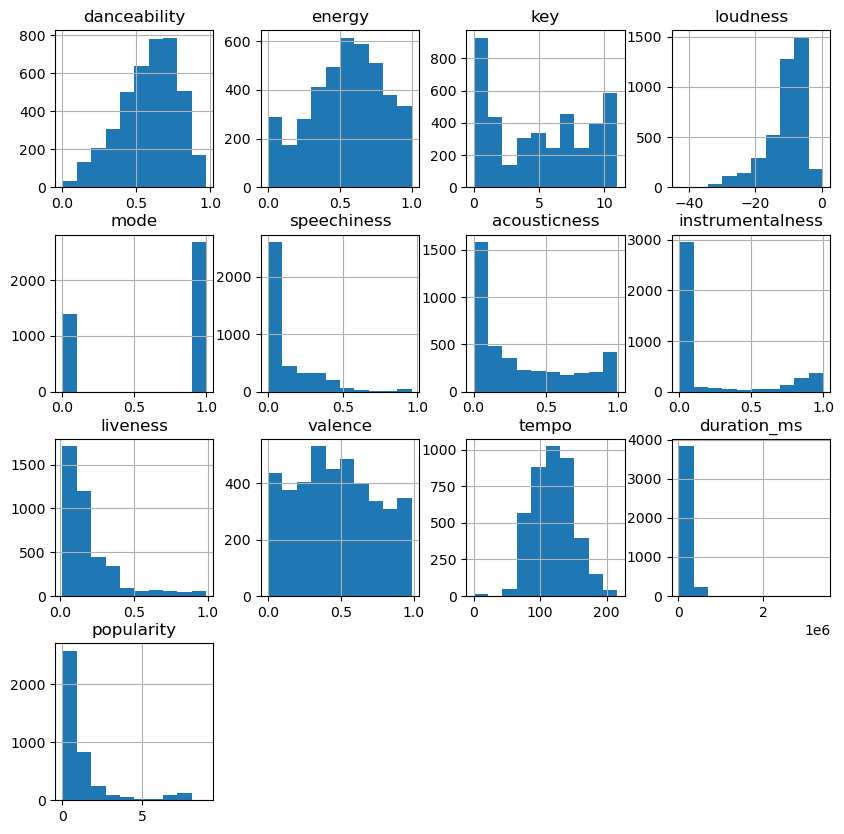

C:\Users\user\AppData\Local\Temp\ipykernel_6120\1422399272.py:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice = data.corr()


Matrice de corrélation:
                  danceability    energy       key  loudness      mode  \
danceability          1.000000  0.158145  0.010114  0.322875 -0.059184   
energy                0.158145  1.000000  0.013762  0.727782 -0.041706   
key                   0.010114  0.013762  1.000000 -0.007885 -0.166626   
loudness              0.322875  0.727782 -0.007885  1.000000  0.014191   
mode                 -0.059184 -0.041706 -0.166626  0.014191  1.000000   
speechiness           0.223674  0.015146  0.023500 -0.028699 -0.092249   
acousticness         -0.281576 -0.648173  0.004109 -0.571242  0.061864   
instrumentalness     -0.293313 -0.298892  0.023555 -0.500009 -0.029501   
liveness             -0.229833  0.126647 -0.005811 -0.099211 -0.007769   
valence               0.492361  0.356126  0.037583  0.369168  0.016731   
tempo                 0.070072  0.249868  0.023043  0.256980  0.004390   
duration_ms          -0.066468  0.079512  0.018420  0.090615 -0.036953   
explicit      

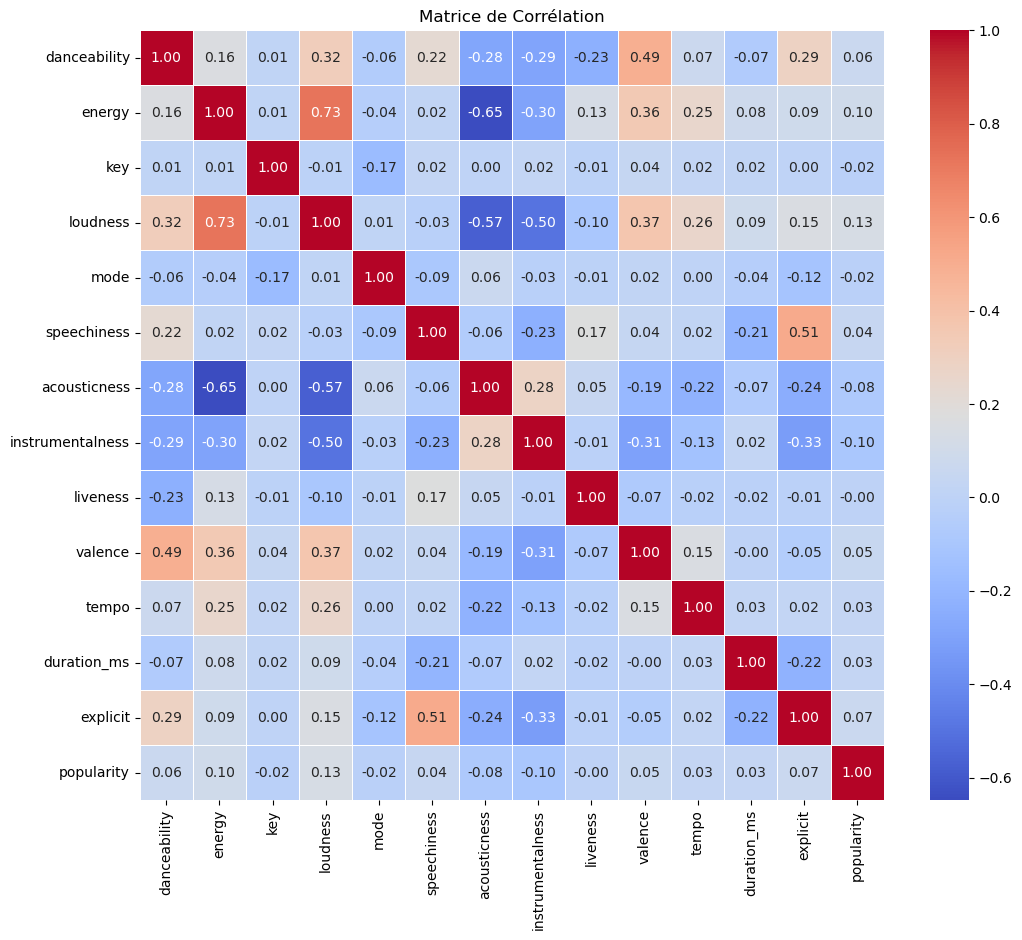

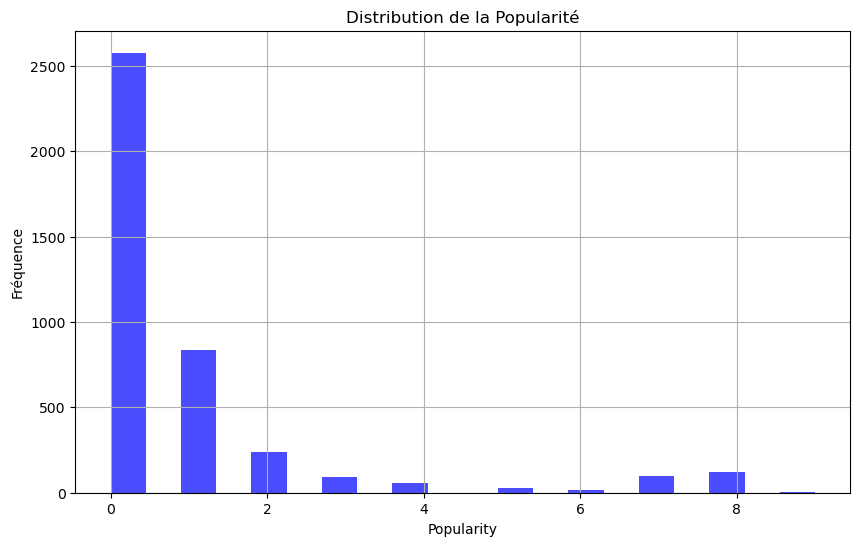

Nombre d'occurrences de chaque classe :
Classe 0 : 2576 occurrences.
Classe 1 : 836 occurrences.
Classe 2 : 240 occurrences.
Classe 3 : 93 occurrences.
Classe 4 : 56 occurrences.
Classe 5 : 30 occurrences.
Classe 6 : 16 occurrences.
Classe 7 : 99 occurrences.
Classe 8 : 123 occurrences.
Classe 9 : 4 occurrences.
Corrélation de popularity :
danceability        0.063003
energy              0.097132
key                -0.020532
loudness            0.134261
mode               -0.017296
speechiness         0.042300
acousticness       -0.080361
instrumentalness   -0.100019
liveness           -0.000472
valence             0.052275
tempo               0.033897
duration_ms         0.031168
explicit            0.065788
popularity          1.000000
Name: popularity, dtype: float64
DataFrame après suppression des colonnes jugées inutiles :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073 entries, 0 to 4072
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  --

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Performances du classifieur arbre de décision:
Taux d'erreur  :  0.36876656067832536 scores : 0.6312334393216746 Temps : 0.449695348739624 s.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Performances du classifieur KPP:
Taux d'erreur  :  0.39749241219829456 scores : 0.6025075878017054 Temps : 0.3027620315551758 s.


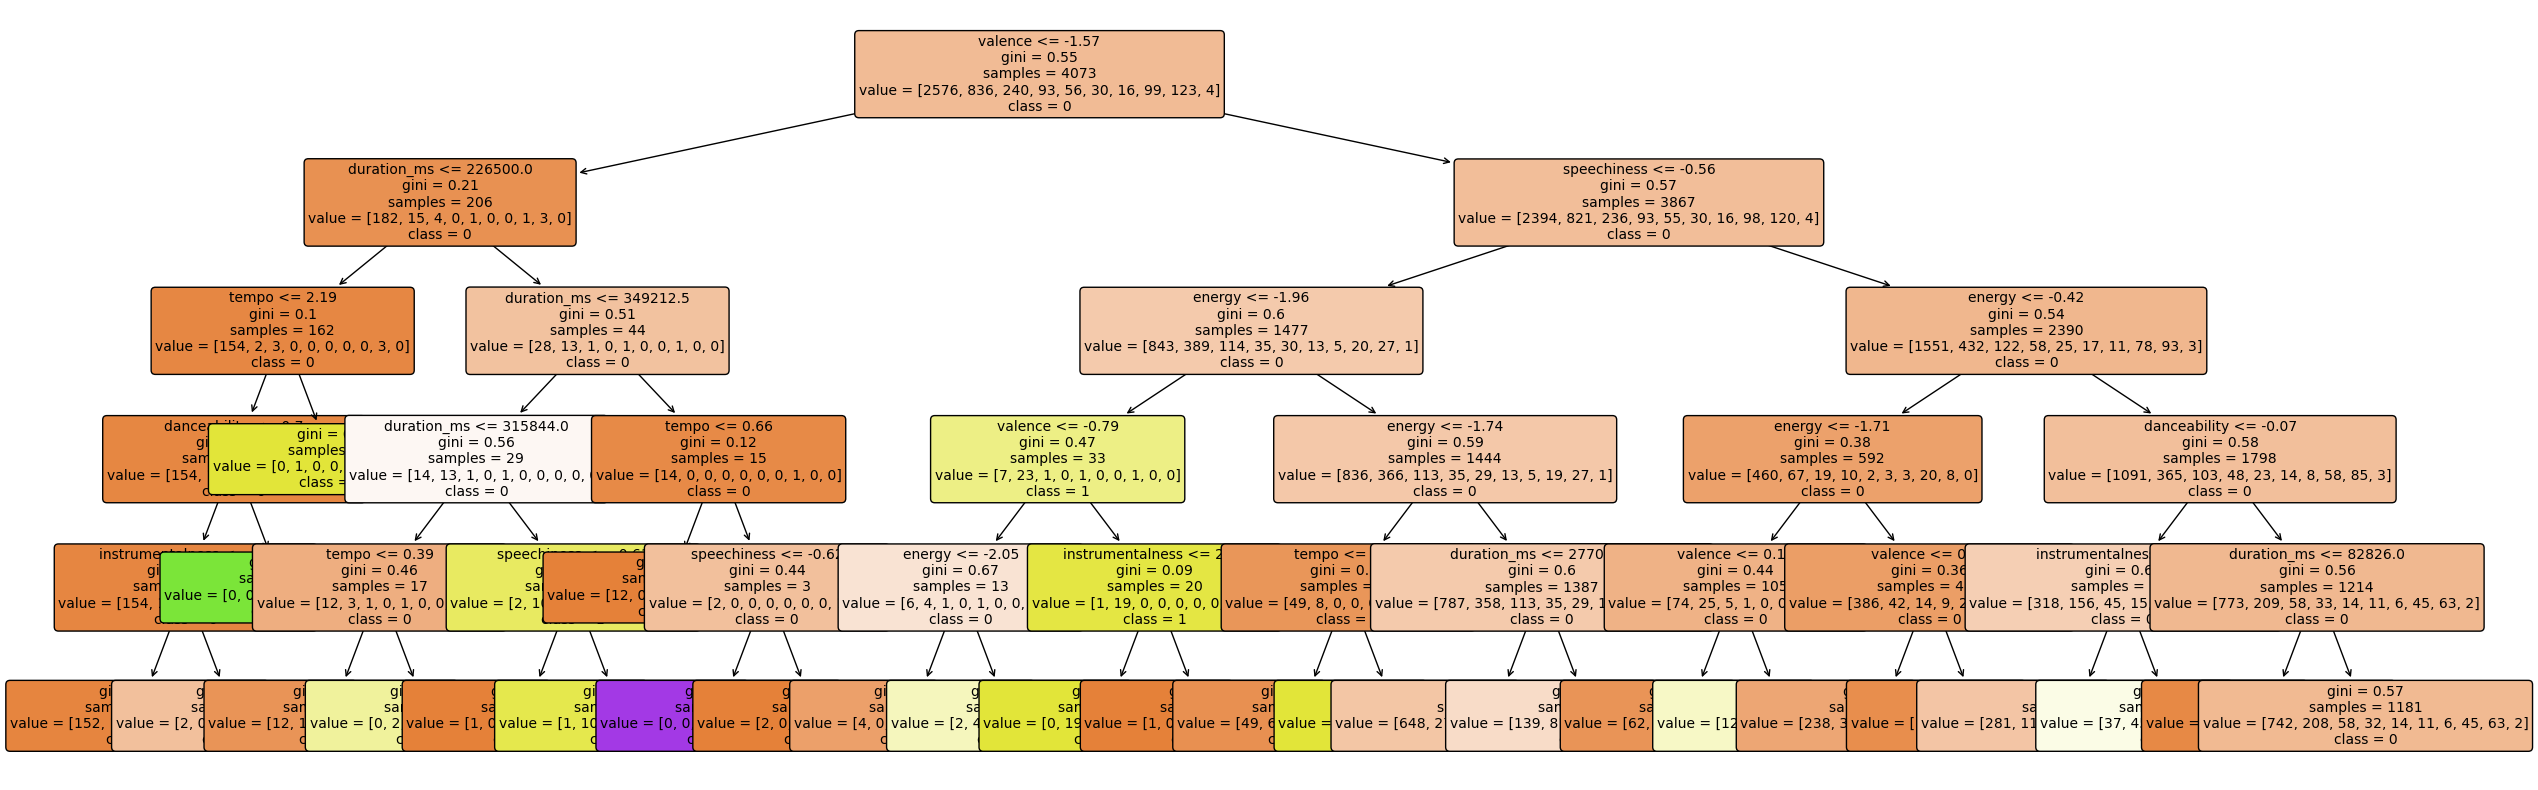

Les 6 colonnes les plus discriminantes :
            Feature  Importance
1            energy    0.270133
4           valence    0.257668
6       duration_ms    0.163374
2       speechiness    0.111883
3  instrumentalness    0.073364
0      danceability    0.064748


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\anaconda3\

Meilleur k: 20
Précision correspondante: 0.6248488461723756


In [2]:
#Import des librairies nécessaires 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time
import seaborn as sns

data = pd.read_csv("unpopular_songs_full.csv") #Lecture du fichier USS
#Statistiques sur nos données
print("Informations sur le DataFrame :")
print(data.info())
print("Description du DataFrame :")
print(data.describe())

print("Valeurs manquantes par colonne:")
print(data.isnull().sum())
data.hist(figsize=(10, 10))
plt.show()

#Matrice de corrélation :
matrice = data.corr()
print("Matrice de corrélation:")
print(matrice)

plt.figure(figsize=(12, 10))
sns.heatmap(matrice, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de Corrélation")
plt.show()


#Distribution des valeurs de popularity :
plt.figure(figsize=(10, 6))
plt.hist(data['popularity'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution de la Popularité')
plt.xlabel('Popularity')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

#Nombre d\'occurrences de chaque classe :
print("Nombre d\'occurrences de chaque classe :")
counts = data['popularity'].value_counts()
counts = counts.sort_index()
for popularity, count in counts.items():
    print("Classe",popularity,":",count,"occurrences.")

print("Corrélation de popularity :")
print(matrice['popularity'])

#Suppression des colonnes :
col = ['track_name', 'track_artist',
       'track_id', 'Unnamed: 17','key','explicit','liveness','mode','acousticness','loudness']
data = data.drop(columns = col)
print("DataFrame après suppression des colonnes jugées inutiles :")
print(data.info())
#Standarisation des attributs réels :
df = data.drop('popularity', axis=1)
print("Avant standarisation :")
print(data.head())
col = df.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
df[col] = scaler.fit_transform(df[col])
df['popularity'] = data['popularity']
print("Après standarisation :")
print(df.head())

X = df.drop('popularity', axis=1)
y = df['popularity']

#Arbre de décision :
clf = DecisionTreeClassifier(max_depth=5)

debut = time.time()
scores = cross_val_score(clf, X, y, cv=10)  
duree = time.time() - debut

print("Performances du classifieur arbre de décision:")
error = 1 - np.mean(scores)
print("Taux d'erreur  : ", error, "scores :", np.mean(scores), "Temps :", duree,"s.")

#KPP :
k = int(np.log(len(X)))

knn = KNeighborsClassifier(n_neighbors=k)
debut = time.time()
scores = cross_val_score(knn, X, y, cv=10)
duree = time.time() - debut

print("Performances du classifieur KPP:")
error = 1 - np.mean(scores)
print("Taux d'erreur  : ", error, "scores :", np.mean(scores), "Temps :", duree,"s.")

#Visualisation de l'arbre :
clf.fit(X, y)

plt.figure(figsize=(30, 10))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=[str(i) for i in range(12)], rounded=True, precision=2, fontsize=10)
plt.show()

#Colonnes discriminantes :
feature_importances = clf.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_features = importance_df.head(6)
print("Les 6 colonnes les plus discriminantes :")
print(top_features)

col =[ 'energy','valence','duration_ms','speechiness','danceability','instrumentalness']
x = X[col]
best_k = 0
best_accuracy = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    accuracy = np.mean(scores)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Meilleur k:", best_k)
print("Précision correspondante:", best_accuracy)

